In [1]:
import numpy as np
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
import time, datetime
import corner
np.random.seed(999)

In [2]:
original_directory = '/scratch/data/galcats/P200new/'
destination_directory = '/home/magnus/data/galcats_nonzero_sfr_no_density_with_growth_rate_no_lastMajM/'
file_name = 'galaxies.Z00.h5'

In [5]:
print(np.sum(galaxies[:, data_dict['Halo_mass']] < 10.5))
print(np.sum(galaxies[:, data_dict['Halo_mass']] > 10.5))

327279
297366


In [3]:
galfile = pd.read_hdf(original_directory + file_name)
galaxies = galfile.values
gal_header = galfile.keys().tolist()
print(gal_header)

data_dict = {}
for col_nr, key in enumerate(gal_header):
    data_dict[key] = col_nr
print(data_dict)

['Halo_mass', 'Halo_growth_rate', 'Halo_mass_peak', 'Scale_peak_mass', 'Scale_half_mass', 'Halo_radius', 'Concentration', 'Halo_spin', 'Stellar_mass', 'SFR', 'Intra_cluster_mass', 'Stellar_mass_obs', 'SFR_obs', 'X_pos', 'Y_pos', 'Z_pos', 'X_vel', 'Y_vel', 'Z_vel', 'Type']
{'Halo_mass': 0, 'Halo_growth_rate': 1, 'Halo_mass_peak': 2, 'Scale_peak_mass': 3, 'Scale_half_mass': 4, 'Halo_radius': 5, 'Concentration': 6, 'Halo_spin': 7, 'Stellar_mass': 8, 'SFR': 9, 'Intra_cluster_mass': 10, 'Stellar_mass_obs': 11, 'SFR_obs': 12, 'X_pos': 13, 'Y_pos': 14, 'Z_pos': 15, 'X_vel': 16, 'Y_vel': 17, 'Z_vel': 18, 'Type': 19}


## Modify SFR

In [154]:
print(np.amax(galaxies[:, data_dict['SFR']]))
print(np.amin(galaxies[:, data_dict['SFR']]))
print(np.mean(galaxies[:, data_dict['SFR']]))

205.63092
0.0
0.78097737


In [140]:
ssfr = galaxies[:, data_dict['SFR']] / np.power(10, galaxies[:, data_dict['Stellar_mass']])
print(len(ssfr[ssfr == 0]))
print(np.amax(ssfr))
print(np.amin(ssfr))

19
1.1868343e-08
0.0


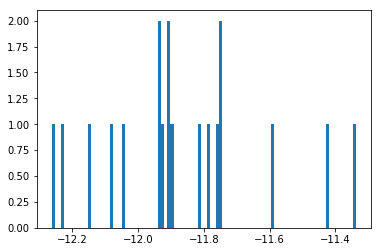

In [141]:
means = -12 * np.ones(np.count_nonzero(ssfr == 0))
dist = np.random.normal(means, .3)
plt.hist(dist, bins=100)
plt.show()

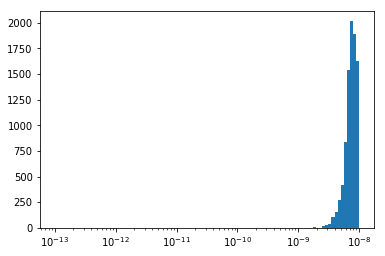

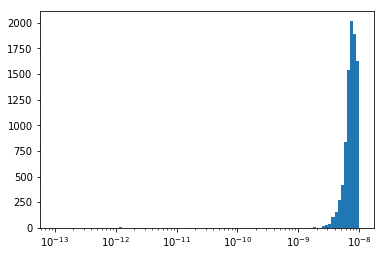

In [142]:
### Plot histogram over ssfr before and after the addition of the extra hump
bins = 10**np.linspace(-13, -8, 100)
plt.xscale('log')
plt.hist(ssfr[ssfr>0], bins=bins)
plt.show()

ssfr[ssfr == 0] = np.power(10, dist)

plt.xscale('log')
plt.hist(ssfr, bins=bins)
plt.show()

In [143]:
log_ssfr = np.log10(ssfr)
log_sfr = log_ssfr + galaxies[:, data_dict['Stellar_mass']]

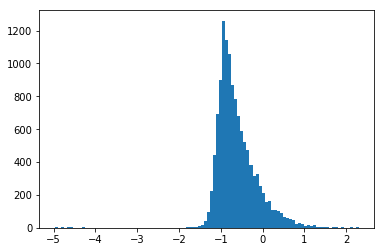

2.3055801
-4.9739056


In [144]:
plt.hist(log_sfr, bins = 100)
plt.show()

print(np.amax(log_sfr))
print(np.amin(log_sfr))

<function matplotlib.pyplot.show(*args, **kw)>

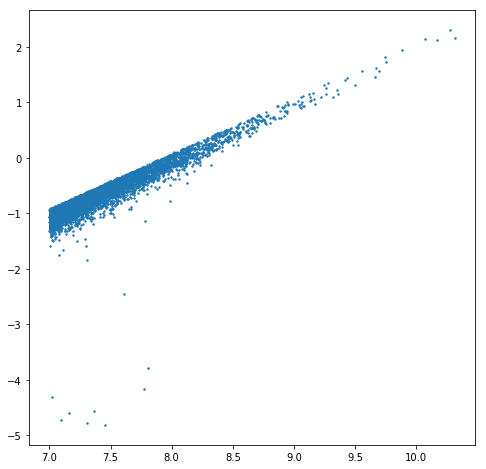

In [146]:
n_data_points = galaxies.shape[0]
subset_indices = np.random.choice(n_data_points, 5000, replace=False)

fig = plt.figure(figsize=(8,8))
plt.scatter(galaxies[subset_indices, data_dict['Stellar_mass']], log_sfr[subset_indices], s=2)
plt.show

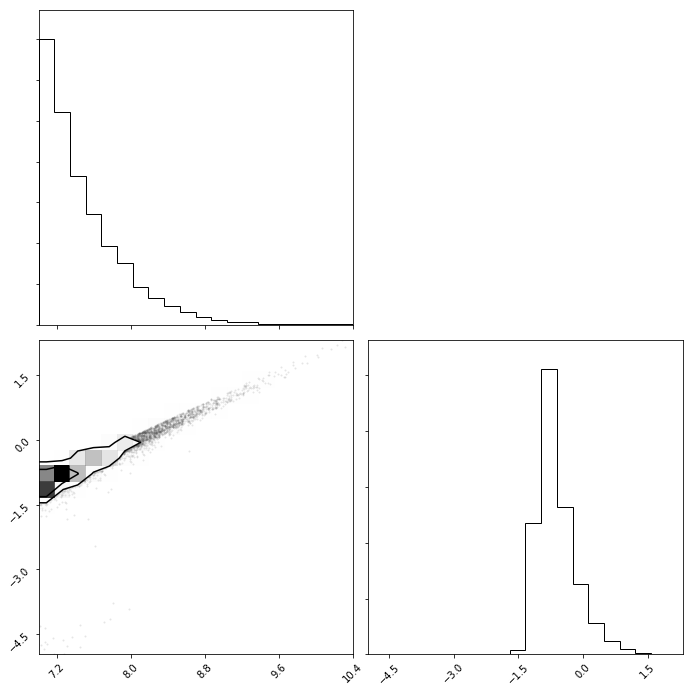

In [147]:
log_sfr_test = np.expand_dims(log_sfr, axis=1)
stellar_masses_test = np.expand_dims(galaxies[:, data_dict['Stellar_mass']], axis=1)

data = np.hstack((stellar_masses_test, log_sfr_test))


figure = corner.corner(data)
figure.set_size_inches(12, 12)
plt.show()

## Make a new pd dataset and save it

In [148]:
pd_dataframe = pd.DataFrame(data=galaxies, columns=gal_header)
pd_dataframe['SFR'] = log_sfr

In [149]:
pd_dataframe.to_hdf(destination_directory + file_name, 'w')

## Try loading the newly created galaxy catalogue

In [150]:
galfile = pd.read_hdf(destination_directory + file_name)
galaxies = galfile.values
gal_header = galfile.keys().tolist()
print(gal_header)
print(np.shape(galaxies))

['Halo_mass', 'Halo_growth_rate', 'Halo_mass_peak', 'Scale_peak_mass', 'Scale_half_mass', 'Halo_radius', 'Concentration', 'Halo_spin', 'Stellar_mass', 'SFR', 'Intra_cluster_mass', 'Stellar_mass_obs', 'SFR_obs', 'X_pos', 'Y_pos', 'Z_pos', 'X_vel', 'Y_vel', 'Z_vel', 'Type']
(12437, 20)


In [151]:
print('{:.2f}'.format(np.mean(galaxies[:,data_dict['SFR']])))
print('{:.2f}'.format(np.amax(galaxies[:,data_dict['SFR']])))
print('{:.2f}'.format(np.amin(galaxies[:,data_dict['SFR']])))
#print(np.sum(galaxies[:,6]) / 200**3)

-0.62
2.31
-4.97
